In [ ]:
# 전국 신규 민간 아파트 분양가격 동향
* 2015년 10월부터 2018년 7월까지
* 주택분양보증을 받아 분양한 전체 민간 신규아파트 분양가격 동향
* https://www.data.go.kr/dataset/3035522/fileData.do
* 이 튜토리얼은 아파트 분양가에 대한 분석보다 파이썬 데이터 분석 방법을 배우는데 목적을 두고 있습니다.
* 이 튜토리얼에서는 파이썬 데이터분석 도구인 Pandas를 활용합니다. Pandas에 대한 간략한 소개는 다음의 판다스 10분 완성 문서를 참고해 주시면 좋습니다. 
    * https://dataitgirls2.github.io/10minutes2pandas/
* 데이터 다운로드 : https://goo.gl/oJydAv 

In [ ]:
## !중요
### 버전과 한글폰트
* 한글폰트 사용하기 : http://corazzon.github.io/matplotlib_font_setting

In [ ]:
# 아래의 버전에 의존성이 있습니다. 
# 다음의 버전으로 설치해 주세요.
# !pip install plotnine==0.5.0
# !pip install pandas
# !pip install folium==0.5.0
# !pip install statsmodels -U
# 시각화 도구 설치
# !pip install missingno

In [ ]:
# 아나콘다 사용시 
* Plotnine 설치 : https://anaconda.org/conda-forge/plotnine
* missingno 설치 : https://anaconda.org/conda-forge/missingno

In [1]:
!pip show plotnine


Name: plotnine
Version: 0.6.0
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: None
Author-email: None
License: GPL-2
Location: /opt/conda/lib/python3.7/site-packages
Requires: statsmodels, descartes, numpy, scipy, pandas, patsy, mizani, matplotlib
Required-by: 


In [2]:
!pip show missingno

Name: missingno
Version: 0.4.2
Summary: Missing data visualization module for Python.
Home-page: https://github.com/ResidentMario/missingno
Author: Aleksey Bilogur
Author-email: aleksey.bilogur@gmail.com
License: UNKNOWN
Location: /opt/conda/lib/python3.7/site-packages
Requires: matplotlib, seaborn, numpy, scipy
Required-by: 


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [127]:
import pandas as pd
import numpy as np
import re

%matplotlib inline

In [128]:
# plotnine 이 import 되지 않는다면 아래 코드의 주석을 풀고 설치해 주세요.
# !pip install statsmodels -U
from plotnine import *

%을 사용하면 터미널에서 사용할 수 있는 유닉스 명령어를 사용하실 수 있습니다.
경로를 불러오는 문제가 있을 때 이 방법을 사용하면 좋습니다.

In [129]:
%pwd

'/home/vscode/notebooks/pd/pdtxtb'

In [ ]:
# 저는 data 폴더 아래에 apt_price 라는 폴더를 만들어 공공데이터 포털에서 다운로드 받은 데이터를 모아 두었습니다. 
# 해당 파일을 확인해 봅니다.
%ls data/

In [7]:
# 한글 파일명 읽을때는 인코딩  encoding='euc-kr'

pre_sale=pd.read_csv('../data/apt_price/전국_평균_분양가격_2018.6월_.csv', encoding='euc-kr', engine='python')
pre_sale.shape

(2805, 5)

In [8]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [9]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2800,제주,전체,2018,6,3925
2801,제주,전용면적 60㎡이하,2018,6,5462
2802,제주,전용면적 60㎡초과 85㎡이하,2018,6,3639
2803,제주,전용면적 85㎡초과 102㎡이하,2018,6,NaN
2804,제주,전용면적 102㎡초과,2018,6,3029


In [10]:
# 분양가격이 숫자 타입이 아닙니다. 숫자 타입으로 변경해줄 필요가 있겠어요.
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 5 columns):
지역명        2805 non-null object
규모구분       2805 non-null object
연도         2805 non-null int64
월          2805 non-null int64
분양가격(㎡)    2674 non-null object
dtypes: int64(2), object(3)
memory usage: 109.7+ KB


In [11]:
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [12]:
# ffill, bfill 등은 
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    131
dtype: int64

In [13]:
import matplotlib.pyplot as plt
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정

plt.rc('font', family='NanumGothic')

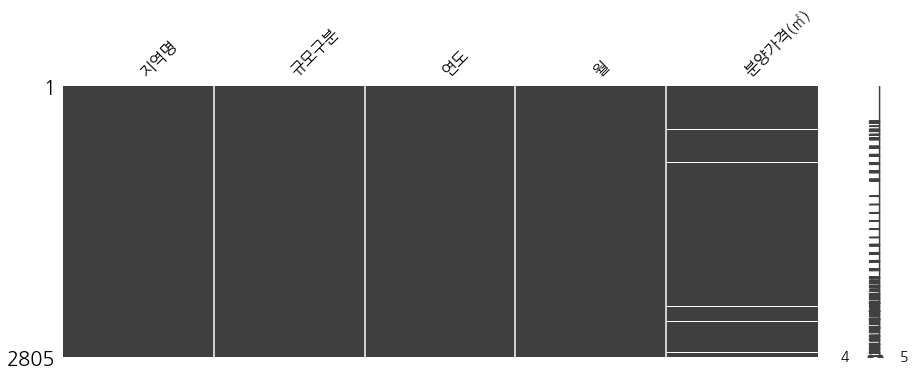

In [14]:
import missingno as msno
msno.matrix(pre_sale, figsize=(15,5))

In [15]:
# 연도와 월은 카테고리 형태의 데이터
# 스트링 형태로 변경 !!!

pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월']   = pre_sale['월'].astype(str)

In [16]:
pre_sale_price = pre_sale['분양가격(㎡)']
pre_sale_price.head()

0    5841
1    5652
2    5882
3    5721
4    5879
Name: 분양가격(㎡), dtype: object

In [17]:
# 분양가격의 타입을 숫자로 변경해 줍니다.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')

# 평당 분양가격 구하기
pre_sale['평당분양가격'] = pre_sale['분양가격']*3.3

In [18]:
pre_sale.dtypes.tail(3)

분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [130]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 7 columns):
지역명        2805 non-null object
규모구분       2805 non-null object
연도         2805 non-null object
월          2805 non-null object
분양가격(㎡)    2674 non-null object
분양가격       2582 non-null float64
평당분양가격     2582 non-null float64
dtypes: float64(2), object(5)
memory usage: 153.5+ KB


In [131]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [20]:
# 빈문자 값은 str로 셀에서 존재하여 카운트가 되었던 것이
# 소숫타입으로 바뀌면서 카운트 되지 못하여 갯수가 줄어들었다.
# 분양가격(㎡)    2674 non-null object
# 분양가격       2582 non-null float64
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    131
분양가격       223
평당분양가격     223
dtype: int64

## 중앙값과 평균의 차이(편차)
- 별로 없으면 좋고
- 많으면 편향된 데이터임 
- -> 데이터 분석시 이상한 결과 도출

In [21]:
pre_sale.describe()

,분양가격,평당분양가격
count,2582.000000,2582.000000
mean,3056.522851,10086.525407
std,1110.111932,3663.369377
min,1868.000000,6164.400000
25%,2339.000000,7718.700000
50%,2738.500000,9037.050000
75%,3289.000000,10853.700000
max,8098.000000,26723.400000


In [22]:
pre_sale.describe(include=[np.object])


,지역명,규모구분,연도,월,분양가격(㎡)
count,2805,2805,2805,2805,2674
unique,17,5,4,12,1278
top,인천,전용면적 60㎡이하,2017,4,2221
freq,165,561,1020,255,17


In [23]:
# 2017년 데이터만 본다
pre_sale_2017 = pre_sale[pre_sale['연도'] == '2017']
pre_sale_2017.shape

(1020, 7)

In [24]:
# 같은 값을 같고 있는 시도별로 동일하게 데이터가
# 들어있는것을 확인 가능
pre_sale['규모구분'].value_counts()

전용면적 60㎡이하           561
전용면적 60㎡초과 85㎡이하     561
전체                   561
전용면적 102㎡초과          561
전용면적 85㎡초과 102㎡이하    561
Name: 규모구분, dtype: int64

In [25]:
pre_sale['지역명'].value_counts()

인천    165
전북    165
충북    165
전남    165
대구    165
충남    165
부산    165
광주    165
경북    165
대전    165
강원    165
세종    165
경기    165
경남    165
서울    165
울산    165
제주    165
Name: 지역명, dtype: int64

# 전국 평균 분양 가격
- groupby와 pivot 활용하기


In [26]:
# 모든 명령어를 외우기 어려우므로
# API 문서 보기가 편한 이유
# 판다스를 지원 해주는 곳에서 모두 가능(익스텐션 포함)
# ?를 통해 도움말 보기
# shift tab 또한 가능
# pre_sale.groupby?

In [27]:
# 분양가격만 봤을 때 2015년에서 2018 년으로 갈수록 오른것 확인
pd.options.display.float_format = '{:,.0f}'.format # 쉼표뒤에 띄우면 안됨
pre_sale.groupby(pre_sale.연도).describe().T

연도             2015   2016   2017   2018
분양가격   count    243    984    899    456
       mean   2,789  2,934  3,140  3,299
       std      977  1,071  1,108  1,199
       min    1,868  1,900  1,976  2,076
       25%    2,225  2,282  2,365  2,470
       50%    2,516  2,672  2,849  2,912
       75%    3,026  3,148  3,456  3,647
       max    7,092  8,096  7,887  8,098
평당분양가격 count    243    984    899    456
       mean   9,203  9,683 10,360 10,888
       std    3,224  3,536  3,655  3,958
       min    6,164  6,270  6,521  6,851
       25%    7,342  7,531  7,804  8,153
       50%    8,303  8,818  9,402  9,611
       75%    9,984 10,390 11,405 12,036
       max   23,404 26,717 26,027 26,723

In [28]:
# T 없을때 transpose 안함
pre_sale.groupby(pre_sale.연도).describe()

분양가격                                           평당분양가격               \
     count  mean   std   min   25%   50%   75%   max  count   mean   std   
연도                                                                         
2015   243 2,789   977 1,868 2,225 2,516 3,026 7,092    243  9,203 3,224   
2016   984 2,934 1,071 1,900 2,282 2,672 3,148 8,096    984  9,683 3,536   
2017   899 3,140 1,108 1,976 2,365 2,849 3,456 7,887    899 10,360 3,655   
2018   456 3,299 1,199 2,076 2,470 2,912 3,647 8,098    456 10,888 3,958   

                                      
       min   25%   50%    75%    max  
연도                                    
2015 6,164 7,342 8,303  9,984 23,404  
2016 6,270 7,531 8,818 10,390 26,717  
2017 6,521 7,804 9,402 11,405 26,027  
2018 6,851 8,153 9,611 12,036 26,723

# 규모별 전국 평균 분양가
- 끌어 올릴때 pivot
- 끌어 내릴때 melt

In [29]:

# pre_sale = pivot_table? 

In [30]:
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,260"
전용면적 60㎡이하,"8,952","9,399","10,246","10,957"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,438"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,457"
전체,"8,893","9,293","9,901","10,560"


# 전국 분양가 변동 금액
규모구분이 전체로 되어 있는 금액으로 연도별 변동금액을 살펴본다

In [31]:
# 규모구분에서 전체로 되어있는 데이터만 가져온다
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체']
region_year = region_year_all.pivot_table(
    '평당분양가격', '지역명', '연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018
0,강원,"7,160","7,011","7,127","7,643"
1,경기,"10,377","11,220","11,850","12,854"
2,경남,"7,586","7,848","8,120","8,894"
3,경북,"7,171","7,361","7,795","8,262"
4,광주,"8,052","8,899","9,464","9,630"
5,대구,"9,232","10,310","11,456","11,652"
6,대전,"8,098","8,502","9,045","9,589"
7,부산,"10,307","10,430","11,578","12,710"
8,서울,"19,725","20,663","21,376","22,299"
9,세종,"8,750","8,860","9,135","10,382"


In [32]:
region_year['변동액'] = (region_year['2018']-region_year['2015']).astype(int)
max_delta_price = np.max(region_year['변동액'])*1000
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

print(f'2015년부터 2018년 까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 {max_delta_price:,.0f}원이다.')
print(f'상승액이 가장 작은 지역은 울산이며 평당 {min_delta_price:,.0f}원이다.')
print(f'하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.')
print(f'전국 평균 변동액은 평당 {mean_delta_price:,.0f}원이다.')

2015년부터 2018년 까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 5,335,000원이다.
상승액이 가장 작은 지역은 울산이며 평당 387,000원이다.
하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.
전국 평균 변동액은 평당 1,666,647원이다.


![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/990px-Anscombe%27s_quartet_3.svg.png)

* 지금까지 2015년 10월에서 2018년 7월까지의 21개월간의 전국 신규 민간 아파트 분양가격 동향 파일을 요약해 봤습니다.
* Pandas를 통해 데이터를 가져오고 요약해 보고 엑셀과 비슷하게 피봇테이블을 그려보기도 하고 groupby를 사용해서 데이터를 요약해 보기도 했습니다.

# 시각화
* 앤스콤의 4인방 영상 : https://www.youtube.com/watch?v=3KqdNNJ-20Y
* 데이터를 시각화 해보기에 앞서 앤스콤의 4인방을 보겠습니다.
* 아래 4개의 그래프는 다른 데이터로 그려졌습니다.
* 또 이 4개의 데이터는 평균, 표준편차, 상관계수가 같습니다. 하지만 시각화 했을 때 전혀 다른 데이터임을 확인할 수 있습니다.
* 이 앤스콤의 4인방은 요약된 데이터만으로 데이터를 판단할 수 없다는 것을 보여줍니다.
* 데이터 시각화의 중요성을 얘기할 때 자주 등장하는 예시입니다.
* [Anscombe's quartet - Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
* [The Datasaurus Dozen - Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing | Autodesk Research](https://www.autodeskresearch.com/publications/samestats)

## 이럴 때 이런 시각화
* [분류:통계 차트와 다이어그램 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B6%84%EB%A5%98:%ED%86%B5%EA%B3%84_%EC%B0%A8%ED%8A%B8%EC%99%80_%EB%8B%A4%EC%9D%B4%EC%96%B4%EA%B7%B8%EB%9E%A8)


## Pandas 로 시각화 하기
* 공식 문서 : [Visualization — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

## Seaborn 으로 시각화 하기
* 공식 문서:[seaborn: statistical data visualization — seaborn 0.9.0 documentation](https://seaborn.pydata.org/)

## 연도별 변동 그래프
* 공공데이터포털에서 제공하고 있는 평균 분양가격을 연도, 지역별로 그려봄
* 폰트 설정을 위해 Matplotlib의 환경설정에서 한글폰트 설정이 필요합니다.
* 한글폰트를 지정해 주지 않는다면 글자가 두부모양으로 깨져보이게 됩니다.

In [33]:
import seaborn as sns

# 아래의 코드로 스타일을 지정해주면 폰트설정이 초기화 된다.
# 따라서 폰트설정은 스타일 지정 이후에 한다
sns.set_style('whitegrid')

In [34]:
import matplotlib.pyplot as plt

# window의 한글폰트 설정
# plt.rc('font', family='Nalgun Gothic')
plt.rc('font', family='NanumGothic')

## Seaborn 으로 막대 그래프 그리기
- 내부적으로 계산을 해서 그리기 때문에 속도가 좀 느리다
- 하지만 seaborn으로 시각화시 내부적 계산
- 따로 데이터를 aggregation 하지 않아도 되는 장점
- seaborn으로 시각화 여부는 그래프코드 앞부분에 sns라는

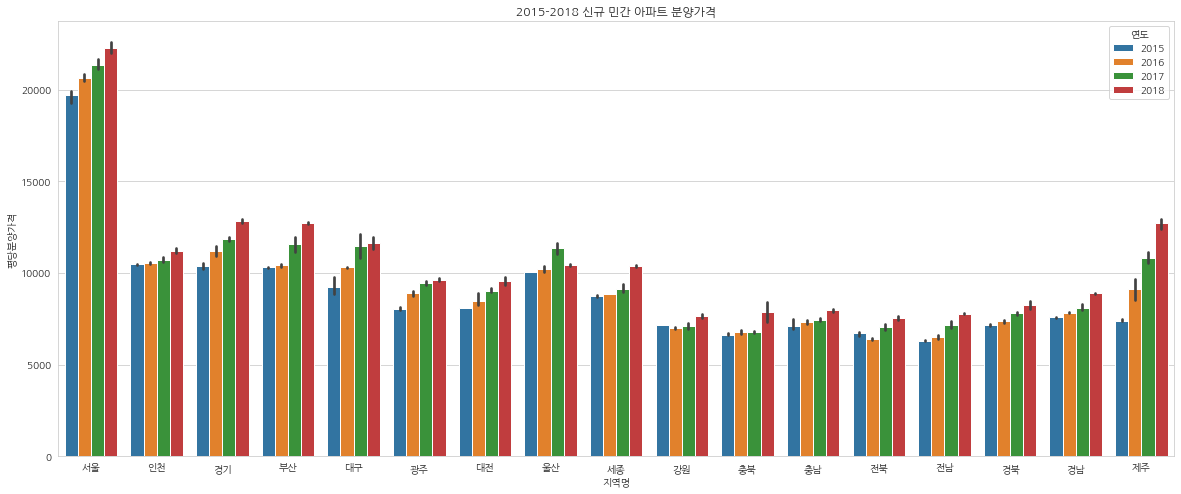

In [35]:
plt.figure(figsize=(20,8))
plt.title('2015-2018 신규 민간 아파트 분양가격')
sns.barplot(data=region_year_all, x='지역명', y='평당분양가격', hue='연도')

## 판다스로 막대 그래프 그리기

In [38]:
# pandas로 시각화를 위해 데이터 변형
# 지역별로 bar plot을 그리고 지역별 bar를 연도별로 그립니다.

df_year_region = pd.pivot_table(region_year_all, index=['지역명'], columns='연도', values='평당분양가격')

# 샘플은 임의 행 추출
df_year_region.sample(3)

연도,2015,2016,2017,2018
지역명,,,,
부산,"10,307","10,430","11,578","12,710"
경기,"10,377","11,220","11,850","12,854"
경북,"7,171","7,361","7,795","8,262"


In [39]:
df_year_region.columns

Index(['2015', '2016', '2017', '2018'], dtype='object', name='연도')

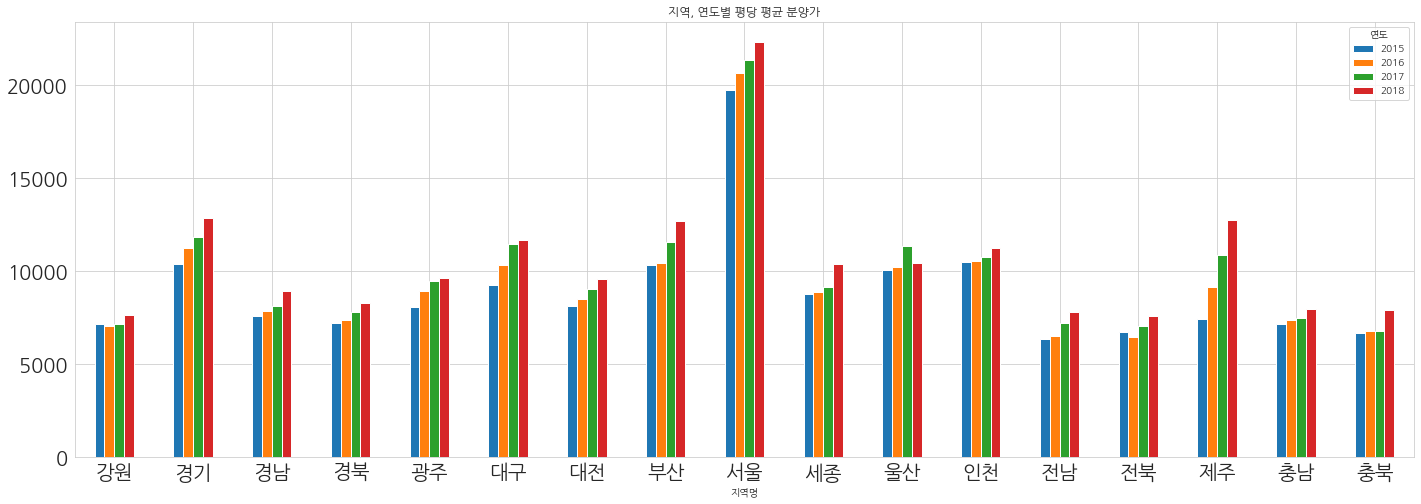

In [40]:
df_year_region.plot.bar(figsize=(24, 8), grid=True, fontsize=20, rot=0, title='지역, 연도별 평당 평균 분양가')

## 규모별 
* seaborn의 barplot은 기본값을 평균으로 구합니다.
* 각각의 막대 그래프 상단에 있는 검은색 선은 신뢰구간을 의미합니다.
* 통계학에서 신뢰 구간(信賴區間, 영어: confidence interval)은 모수가 어느 범위 안에 있는지를 확률적으로 보여주는 방법이다. 
* 신뢰구간 정의 출처 : [신뢰 구간 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%8B%A0%EB%A2%B0_%EA%B5%AC%EA%B0%84)
* seaborn의 barplot의 옵션 중 ci가 이 신뢰 구간을 의미하며 기본값은 95입니다.
* 표본의 95%의 데이터가 검은색 선 안에 위치하고 있음을 알 수 있습니다.
* 나머지 5%의 데이터는 이 표본을 벗어나는 데이터로 너무 크거나 작은 데이터를 제외하고 볼 수 있습니다.
* 따라서 이 검은색 선을 벗어나는 데이터는 이상치(outlier)로 볼 수도 있습니다.

In [41]:
# 서울의 경우 전용면적 85㎡초과 102㎡이하가 분양가격이 가장 비싸게 나옵니다.
# (ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
#  + geom_bar(stat='identity', position='dodge')
#  + ggtitle('규모별 신규 민간 아파트 분양가격')
#  + theme(text=element_text(family='NanumBarunGothic'),
#          figure_size=(8, 4))
# )

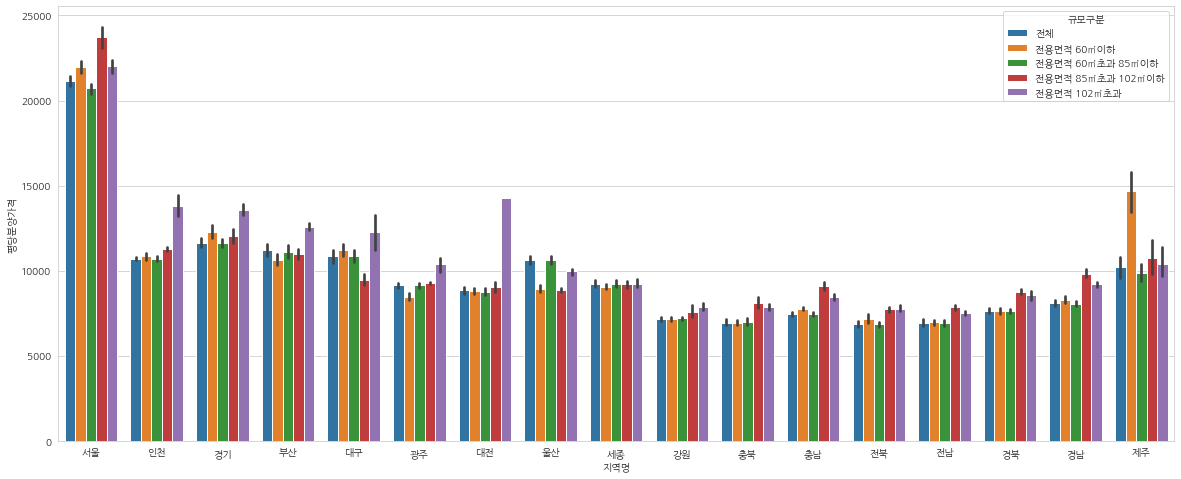

In [42]:
# seaborn 을 사용하면 위 코드보다 훨씬 간결하게 코드를 구현할 수 있습니다.
# seaborn 으로 지역, 규모별 평당 평균 분양가격
plt.figure(figsize=(20, 8))
sns.barplot(data=pre_sale, x='지역명', y='평당분양가격', hue='규모구분')

## 지역별 평당 분양가격 합계
* 아래 데이터로 규모(제곱미터)에 따른 평당 분양가격을 봅니다.

In [43]:
# df_year_region = pd.pivot_table(region_year_all, index=['지역명'], columns='연도', values='평당분양가격')

pre_sale_size = pre_sale.pivot_table(index='지역명', columns='규모구분', values='평당분양가격')
pre_sale_size.sample(3)

규모구분,전용면적 102㎡초과,전용면적 60㎡이하,전용면적 60㎡초과 85㎡이하,전용면적 85㎡초과 102㎡이하,전체
지역명,,,,,
광주,"10,381","8,494","9,159","9,296","9,151"
대전,"14,282","8,816","8,779","9,037","8,854"
경남,"9,222","8,320","8,088","9,834","8,113"


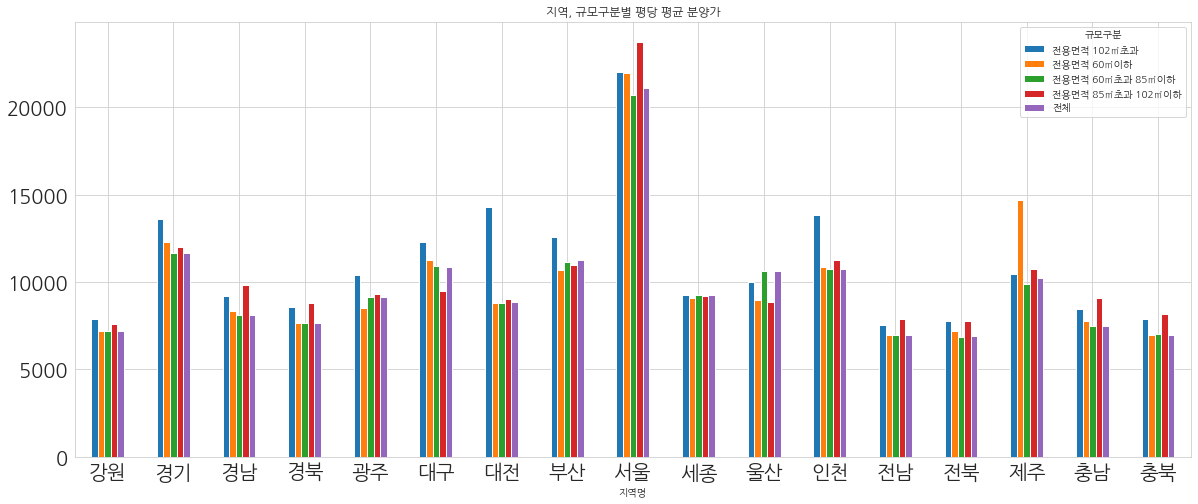

In [44]:
pre_sale_size.plot.bar(figsize=(20, 8), grid=True, fontsize=20, rot=0, title='지역, 규모구분별 평당 평균 분양가')

In [45]:
pre_sale[(pre_sale["지역명"] == "대전")&(pre_sale["규모구분"] == "전용면적 102㎡초과")].sample(3)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
119,대전,전용면적 102㎡초과,2015,11,,nan,nan
884,대전,전용면적 102㎡초과,2016,8,NaN,nan,nan
2669,대전,전용면적 102㎡초과,2018,5,NaN,nan,nan


In [46]:
# 위에 그린 그래프를 지역별로 나눠 봅니다.
# (ggplot(pre_sale)
#  + aes(x='연도', y='평당분양가격', fill='규모구분')
#  + geom_bar(stat='identity', position='dodge')
#  + facet_wrap('지역명')
#  + theme(text=element_text(family='NanumBarunGothic'),
#          axis_text_x=element_text(rotation=70),
#          figure_size=(12, 12))
# )

In [47]:
pre_sale_size_t = pre_sale_size.T
pre_sale_size_t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,"7,871","13,601","9,222","8,586","10,381","12,303","14,282","12,584","22,035","9,259","9,974","13,836","7,550","7,793","10,435","8,477","7,900"
전용면적 60㎡이하,"7,185","12,300","8,320","7,646","8,494","11,254","8,816","10,656","21,976","9,071","8,965","10,853","6,980","7,184","14,700","7,772","6,951"
전용면적 60㎡초과 85㎡이하,"7,216","11,650","8,088","7,657","9,159","10,889","8,779","11,135","20,718","9,237","10,651","10,719","6,943","6,868","9,908","7,484","7,019"
전용면적 85㎡초과 102㎡이하,"7,612","12,029","9,834","8,776","9,296","9,497","9,037","10,971","23,714","9,210","8,861","11,286","7,858","7,739","10,744","9,102","8,145"
전체,"7,183","11,664","8,113","7,661","9,151","10,854","8,854","11,241","21,127","9,230","10,628","10,727","6,958","6,877","10,230","7,474","6,966"


## 전국 규모(면적)별 신규 민간 아파트 분양가격

In [48]:
pre_sale.sample()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
1352,경남,전용면적 60㎡초과 85㎡이하,2017,1,2382,"2,382","7,861"


In [49]:
pre_sale[["지역명", "평당분양가격", "규모구분"]].sample(3)

,지역명,평당분양가격,규모구분
271,부산,"9,738",전용면적 60㎡이하
2697,전북,"7,590",전용면적 60㎡초과 85㎡이하
1291,부산,"9,999",전용면적 60㎡이하


In [50]:
pre_sale.shape

(2805, 7)

In [51]:
pre_sale["평당분양가격"].isnull().sum()

223

In [52]:
# 결측치는 시각화에 방해
# 드롭한다

pre_sale["평당분양가격"].dropna(inplace=True, axis=0)

In [53]:
# 결측치 재확인
pre_sale["평당분양가격"].isnull().sum()

0

In [54]:
pre_sale.shape

(2805, 7)

In [55]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [56]:
pre_sale["평당분양가격"] = pre_sale["평당분양가격"].astype(int)

In [57]:
pre_sale[pre_sale["평당분양가격"] == 0]

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격


In [58]:
pre_sale["규모구분"].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [59]:
pre_sale_size.sample(3)

규모구분,전용면적 102㎡초과,전용면적 60㎡이하,전용면적 60㎡초과 85㎡이하,전용면적 85㎡초과 102㎡이하,전체
지역명,,,,,
울산,"9,974","8,965","10,651","8,861","10,628"
부산,"12,584","10,656","11,135","10,971","11,241"
경기,"13,601","12,300","11,650","12,029","11,664"


## box-and-whisker plot | diagram

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

* [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.


1. 최솟값
1. 제 1사분위수
1. 제 2사분위수( ), 즉 중앙값
1. 제 3 사분위 수( )
1. 최댓값

* Box plot 이해하기 : [Understanding Boxplots – Towards Data Science](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

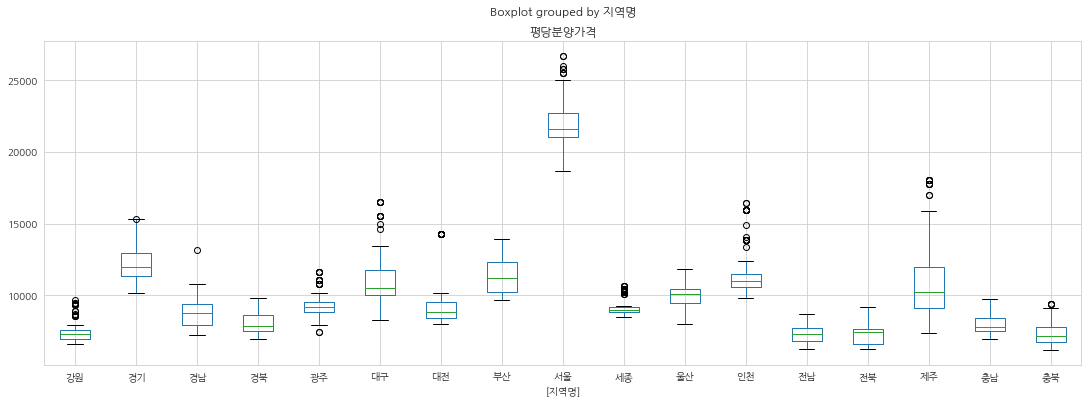

In [60]:
# 아래 그래프를 통해 지역마다 0값이 존재하는것으로 결측치 있음을 확인

pre_sale[['지역명', '평당분양가격']].boxplot(by=['지역명'], figsize=(18, 6))

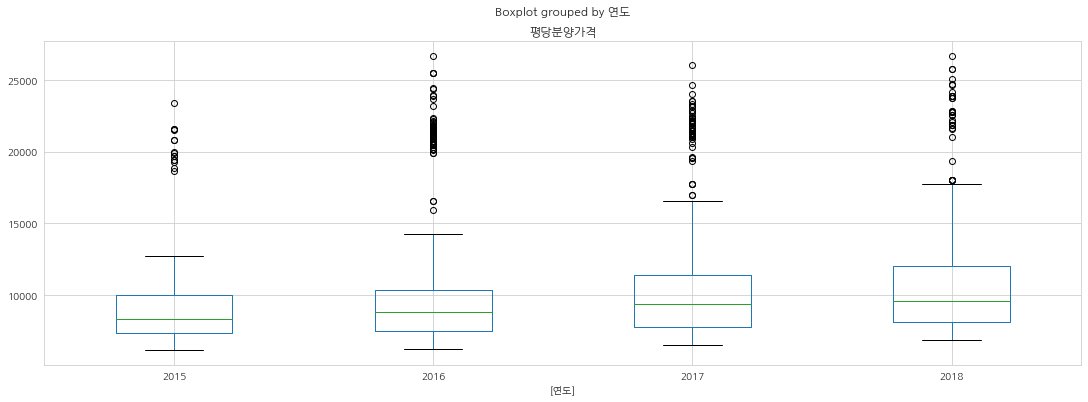

In [61]:
pre_sale[['연도', '지역명', '평당분양가격']].boxplot(by=['연도'], figsize=(18, 6))

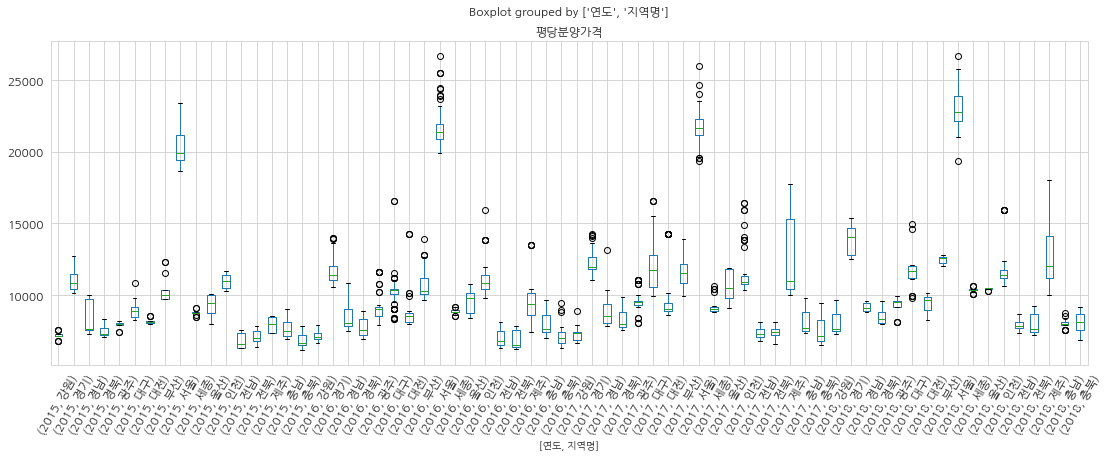

In [62]:
pre_sale[['연도', '지역명', '평당분양가격']].boxplot(by=['연도', '지역명'], figsize=(18, 6), fontsize=12, rot=60)

In [63]:
pre_sale_seoul = pre_sale[pre_sale["지역명"]=="서울"]

# (ggplot(pre_sale_seoul)
#  + aes(x='연도', y='평당분양가격', fill='규모구분')
#  + ggtitle('서울 연도/규모별 신규 민간 아파트 분양가격')
#  + geom_boxplot()
#  + theme(text=element_text(family='NanumBarunGothic'))
# )

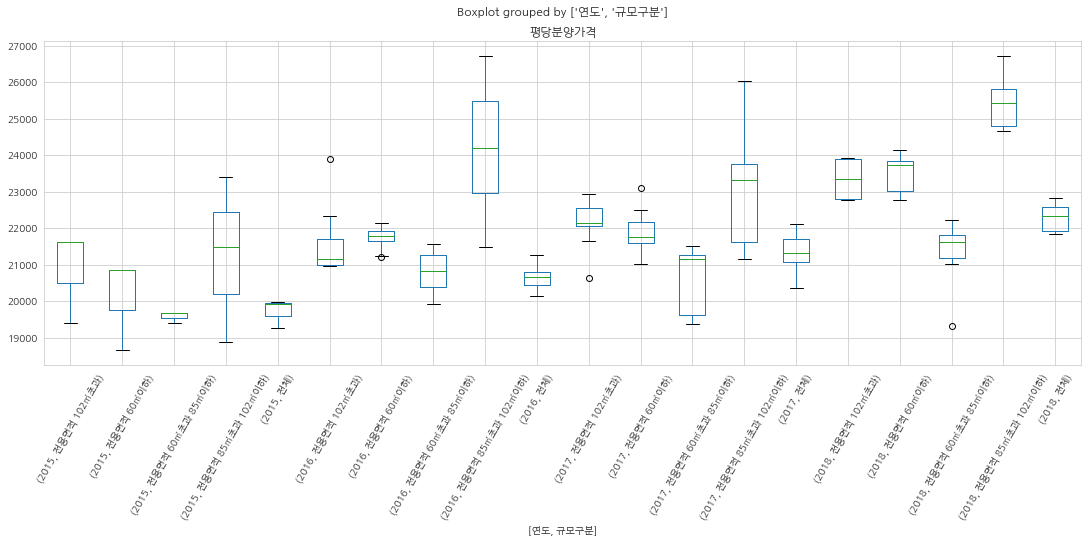

In [64]:
pre_sale_seoul[['연도', '규모구분', '평당분양가격']].boxplot(by=['연도', '규모구분'], figsize=(18, 6), rot=60)

In [65]:
pre_sale_jeju = pre_sale[pre_sale["지역명"]=="제주"]

# (ggplot(pre_sale_jeju)
#  + aes(x='연도', y='평당분양가격', fill='규모구분')
#  + geom_boxplot()
#  + theme(text=element_text(family='NanumBarunGothic'))
# )

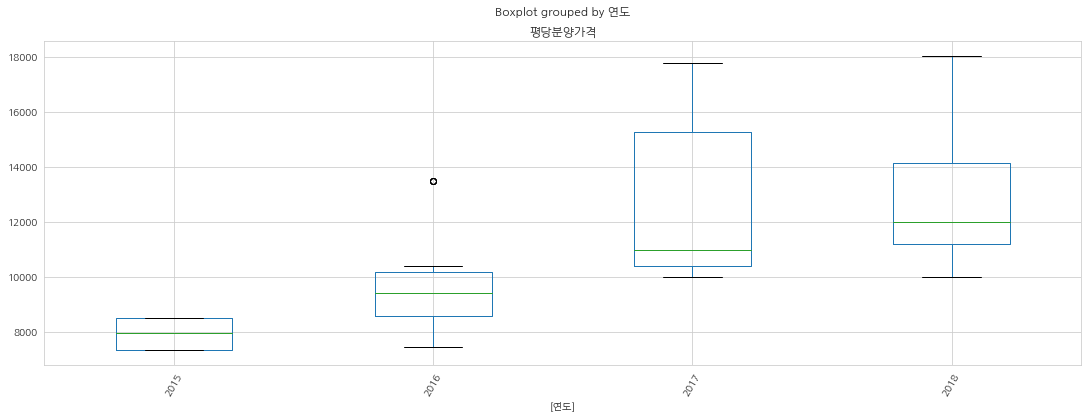

In [66]:
pre_sale_jeju[['연도', '평당분양가격']].boxplot(by=['연도'], figsize=(18, 6), rot=60)

# Tidy Data 만들기
* [Tidy data - Wikipedia](https://en.wikipedia.org/wiki/Tidy_data)
## 2013년 12월~2015년 9월 3.3㎡당 분양가격
* 2015년 10월부터 2018년 4월까지 데이터는 평당 분양가로 조정을 해주었었는데 이 데이터는 평당 분양가가 들어가 있습니다다.
* `지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv`을  https://www.data.go.kr/dataset/3035522/fileData.do 에서 다운로드 받거나 다음의 경로에서 다운로드 받습니다. https://goo.gl/oJydAv



- 변수(variable):에를 들면 몸무게, 키
- 값(value): 73kg, 171cm
- 관측치(observation): 값을 측정한 단위, 여기서는 각각의 사람

In [67]:
# 한글파일명 읽기 :  encoding='euc-kr'
df = pd.read_csv('../data/apt_price/지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv', \
                 encoding='euc-kr', skiprows=1, header=0, engine='python')
df.shape

(23, 27)

In [68]:
# pandas에서 보기 쉽게 컬럼을 변경해 줄 필요가 있습니다.
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722


In [69]:
year = df.iloc[0]
month = df.iloc[1]

In [70]:
# 결측치를 채워주자

print(year, month)

Unnamed: 0                구분
Unnamed: 1               NaN
Unnamed: 2             2013년
Unnamed: 3             2014년
Unnamed: 4               NaN
Unnamed: 5               NaN
Unnamed: 6               NaN
Unnamed: 7               NaN
Unnamed: 8               NaN
Unnamed: 9               NaN
Unnamed: 10              NaN
Unnamed: 11              NaN
Unnamed: 12              NaN
Unnamed: 13              NaN
Unnamed: 14              NaN
Unnamed: 15            2015년
Unnamed: 16              NaN
Unnamed: 17              NaN
Unnamed: 18              NaN
Unnamed: 19              NaN
Unnamed: 20              NaN
Unnamed: 21              NaN
Unnamed: 22              NaN
Unnamed: 23              NaN
Unnamed: 24              NaN
Unnamed: 25              NaN
Unnamed: 26    (단위: 천원/3.3㎡)
Name: 0, dtype: object Unnamed: 0        시도
Unnamed: 1       시군구
Unnamed: 2       12월
Unnamed: 3        1월
Unnamed: 4        2월
Unnamed: 5        3월
Unnamed: 6        4월
Unnamed: 7        5월
Unnamed: 8        6월
Unnam

In [71]:
# 다음과 같이 불규칙적인 실무데이터는 규칙적 판다스 튜토리얼에는 없다
# 경험에서 나오는 전처리 코드는 아주 요긴하게 쓰인다
# 다음에도 조금만 바꿔 사용할 수 있게  정리해보라

# 컬럼을 새로 만들어 주기 위해 0번째와 1번째 행을 합쳐준다.
for i, y in enumerate(year):
    if i == 1:
        # year[0]= '구분', year[1]='시군구'
        year[i] = '시군구'
    if i == 2 :
        # year[2] = 2013년    
        year[i] = ' '.join([year[i], month[i]])
        
    if i > 2 and i < 15:
        year[i] = ' '.join(['2014년', month[i]])
    if i >= 15:
        year[i] = ' '.join(['2015년', month[i]])
        
print(year)

Unnamed: 0              구분
Unnamed: 1             시군구
Unnamed: 2       2013년 12월
Unnamed: 3        2014년 1월
Unnamed: 4        2014년 2월
Unnamed: 5        2014년 3월
Unnamed: 6        2014년 4월
Unnamed: 7        2014년 5월
Unnamed: 8        2014년 6월
Unnamed: 9        2014년 7월
Unnamed: 10       2014년 8월
Unnamed: 11       2014년 9월
Unnamed: 12      2014년 10월
Unnamed: 13      2014년 11월
Unnamed: 14      2014년 12월
Unnamed: 15       2015년 1월
Unnamed: 16       2015년 2월
Unnamed: 17       2015년 3월
Unnamed: 18       2015년 4월
Unnamed: 19       2015년 5월
Unnamed: 20       2015년 6월
Unnamed: 21       2015년 7월
Unnamed: 22       2015년 8월
Unnamed: 23       2015년 9월
Unnamed: 24      2015년 전월비
Unnamed: 25     2015년 전년말비
Unnamed: 26    2015년 전년동월비
Name: 0, dtype: object


In [72]:
df.columns = year

In [73]:
df = df.drop(df.index[[0, 1]])
df.head()

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131


In [74]:
#최근 데이터의 컬럼으로 기존 데이터 프레임과 합치기 위해 컬럼명을 봅니다
pre_sale.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [75]:
# 지역 컬럼을 새로 만들어 시도와 시군구를 합쳐줍니다.
# 결측치를 빈문자로 채웁니다.
# df.fillna(method='ffill')

df['구분'] = df['구분'].fillna('')
df['시군구'] = df['시군구'].fillna('')

In [76]:
df['지역'] = df['구분'] + df['시군구']

In [77]:
df['지역']

2          전국
3          서울
4     6대광역시부산
5          대구
6          인천
7          광주
8          대전
9          울산
10           
11         경기
12        수도권
13         세종
14       지방강원
15         충북
16         충남
17         전북
18         전남
19         경북
20         경남
21         제주
22           
Name: 지역, dtype: object

In [78]:
melt_columns = df.columns.copy()
melt_columns


Index(['구분', '시군구', '2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월', '2015년 전월비', '2015년 전년말비', '2015년 전년동월비', '지역'],
      dtype='object', name=0)

In [79]:
pre_sale.sample(3)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
627,대전,전용면적 60㎡초과 85㎡이하,2016,5,2427,"2,427","8,009"
1237,강원,전용면적 60㎡초과 85㎡이하,2016,12,2085,"2,085","6,880"
946,경기,전용면적 60㎡이하,2016,9,3444,"3,444","11,365"


In [80]:
df_2013_2015 = pd.melt(df, id_vars=['지역'], value_vars=['2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월',
       '2014년 9월', '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월',
       '2015년 2월', '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월',
       '2015년 7월', '2015년 8월', '2015년 9월'])
df_2013_2015.head()

,지역,0,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [81]:
df_2013_2015.columns

Index(['지역', 0, 'value'], dtype='object')

In [82]:
df_2013_2015.columns = ['지역', '기간', '분양가']
df_2013_2015.columns

Index(['지역', '기간', '분양가'], dtype='object')

In [83]:
year_test = ['2013', ' 12월']
year_test

['2013', ' 12월']

In [84]:
year_test[1].strip().replace('월', '')

'12'

In [85]:
# 간단하게 표현하기 위해서 lambda 익명함수로 구현했습니다.
# year_month에 split '년'을 해서 [0]번째것을 넣겠다
df_2013_2015['연도'] = df_2013_2015['기간'].apply(
    lambda year_month : year_month.split('년')[0])

In [86]:

df_2013_2015['월'] = df_2013_2015['기간'].apply(
    lambda year_month : re.sub('월', '', year_month.split('년')[1]).strip())

In [87]:
df_2013_2015.head()

,지역,기간,분양가,연도,월
0,전국,2013년 12월,"8,059",2013,12
1,서울,2013년 12월,"18,189",2013,12
2,6대광역시부산,2013년 12월,"8,111",2013,12
3,대구,2013년 12월,"8,080",2013,12
4,인천,2013년 12월,"10,204",2013,12


In [88]:
# 익명함수가 익숙하지 않다면 아래의 방법대로 함수를 직접 구현하셔서 apply로 적용하는 방법도 있습니다.
def get_year(year_month):
    year = year_month.split('년')[0]
    return year

def get_month(year_month):
    month = re.sub('월', '', year_month.split('년')[1]).strip()
    return month

In [89]:
df_2013_2015['연도'] = df_2013_2015['기간'].apply(get_year)
df_2013_2015['월'] = df_2013_2015['기간'].apply(get_month)

In [90]:
df_2013_2015.head()

,지역,기간,분양가,연도,월
0,전국,2013년 12월,"8,059",2013,12
1,서울,2013년 12월,"18,189",2013,12
2,6대광역시부산,2013년 12월,"8,111",2013,12
3,대구,2013년 12월,"8,080",2013,12
4,인천,2013년 12월,"10,204",2013,12


## 지역명 강원과 부산 정리

In [91]:
df_2013_2015['지역'].value_counts()

           44
충북         22
광주         22
전남         22
세종         22
수도권        22
지방강원       22
경기         22
서울         22
제주         22
인천         22
경북         22
대구         22
전국         22
울산         22
6대광역시부산    22
경남         22
충남         22
대전         22
전북         22
Name: 지역, dtype: int64

In [92]:
# lambda 익명함수를 이용해서 정규표현식으로 문자열을 바꿔주는 방법이 있습니다.
# 하지만 좀 더 간단한 아래의 방법을 사용해 보겠습니다.
# df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('6대광역시부산','부산', x))
# df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('지방강원','강원', x))

# 위와 같이 정규표현식의 기능을 활용할 수도 있으나 좀 더 간단한 replace를 사용합니다.
df_2013_2015['지역'] = df_2013_2015['지역'].replace('6대광역시부산','부산')
df_2013_2015['지역'] = df_2013_2015['지역'].replace('지방강원','강원')

# 그룹화하여 카운트 합니다.
df_2013_2015['지역'].value_counts()

       44
충북     22
광주     22
전남     22
세종     22
수도권    22
부산     22
서울     22
제주     22
전북     22
인천     22
경기     22
대구     22
전국     22
울산     22
경남     22
충남     22
대전     22
강원     22
경북     22
Name: 지역, dtype: int64

In [93]:
df_2013_2015.describe()

,지역,기간,분양가,연도,월
count,462,462,462,462,462
unique,20,22,371,3,12
top,,2014년 9월,"8,067",2014,3
freq,44,21,7,252,42


In [94]:
df_2013_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 5 columns):
지역     462 non-null object
기간     462 non-null object
분양가    462 non-null object
연도     462 non-null object
월      462 non-null object
dtypes: object(5)
memory usage: 18.2+ KB


In [95]:
# 분양가에 있는 , 를 제거합니다.
df_2013_2015['분양가격'] = df_2013_2015['분양가'].str.replace(',', '').astype(int)

In [96]:
df_2013_2015['분양가'].describe()

count       462
unique      371
top       8,067
freq          7
Name: 분양가, dtype: object

In [97]:
df_2013_2015['분양가격'].describe()

count      462
mean     8,611
std      2,868
min      5,609
25%      6,754
50%      8,067
75%      8,980
max     20,670
Name: 분양가격, dtype: float64

## 2013년 12월 부터 2015년 9월까지의 데이터 시각화 하기

In [98]:
# sns.boxplot?

In [99]:
df_2013_2015[df_2013_2015.isnull()].shape

(462, 6)

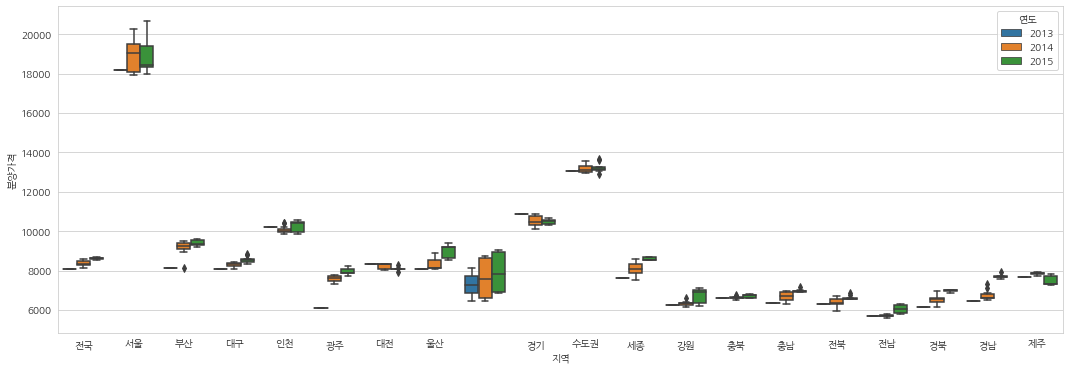

In [100]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=df_2013_2015, x='지역', y='분양가격', hue='연도')

## 이제 2013년부터 2018년 7월까지 데이터를 합칠 준비가 됨
- df_2013_2015_prepare에 컬럼 담기
- df_2015_2018_prepare에 컬럼 담기

In [101]:
df_2015_2018 = pre_sale.loc[pre_sale['규모구분'] == '전체']
print(df_2015_2018.shape)
df_2015_2018.head()

(561, 7)


,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,"5,841","19,275"
5,인천,전체,2015,10,3163,"3,163","10,437"
10,경기,전체,2015,10,3138,"3,138","10,355"
15,부산,전체,2015,10,3112,"3,112","10,269"
20,대구,전체,2015,10,2682,"2,682","8,850"


### df_2013_2015_prepare에 컬럼 담기

In [102]:
df_2013_2015.columns

Index(['지역', '기간', '분양가', '연도', '월', '분양가격'], dtype='object')

In [103]:
df_2013_2015_prepare = df_2013_2015[['지역', '연도', '월', '분양가격']]
df_2013_2015_prepare.head()

,지역,연도,월,분양가격
0,전국,2013,12,8059
1,서울,2013,12,18189
2,부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204


In [104]:
df_2013_2015_prepare.columns = ['지역명', '연도', '월', '평당분양가격']

### df_2015_2018_prepare에 컬럼 담기

In [105]:
df_2015_2018.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [106]:
df_2015_2018_prepare = df_2015_2018[['지역명', '연도', '월', '평당분양가격']]
df_2015_2018_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,"19,275"
5,인천,2015,10,"10,437"
10,경기,2015,10,"10,355"
15,부산,2015,10,"10,269"
20,대구,2015,10,"8,850"


In [107]:
df_2015_2018_prepare.describe()

,평당분양가격
count,544
mean,"9,702"
std,"3,361"
min,"6,299"
25%,"7,484"
50%,"8,928"
75%,"10,554"
max,"22,832"


### 담은 것 각각을 concat해서 2013~2018로 모으기

In [124]:
df_2013_2018 = pd.concat([df_2013_2015_prepare, df_2015_2018_prepare])
df_2013_2018.shape

(1023, 4)

In [125]:
df_2013_2018.head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
1,서울,2013,12,"18,189"
2,부산,2013,12,"8,111"
3,대구,2013,12,"8,080"
4,인천,2013,12,"10,204"


In [126]:
df_2013_2018.tail()

,지역명,연도,월,평당분양가격
2780,전북,2018,6,"7,675"
2785,전남,2018,6,"7,774"
2790,경북,2018,6,"8,682"
2795,경남,2018,6,"8,893"
2800,제주,2018,6,"12,952"


In [111]:
df_2013_2015_region= df_2013_2015_prepare['지역명'].unique()
df_2013_2015_region

array(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '', '경기', '수도권',
       '세종', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [112]:
df_2015_2018_region = df_2015_2018_prepare['지역명'].unique()
df_2015_2018_region

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [113]:
exclude_region = [region for region in df_2013_2015_region if not region in df_2015_2018_region] 
exclude_region

['전국', '', '수도권']

In [114]:
df_2013_2018.shape

(1023, 4)

In [115]:
df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
10,수도권,2013,12,"13,083"
21,전국,2014,1,"8,130"
31,수도권,2014,1,"12,995"
42,전국,2014,2,"8,195"


In [116]:
df_2013_2018.drop(
    df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].index, 
    axis=0, 
    inplace=True)
df_2013_2018.drop(
    df_2013_2018.loc[df_2013_2018['지역명'] == ''].index, 
    axis=0, 
    inplace=True)

## 2013년 12월~2018년 7월 전국 신규 민간 아파트 분양가격 동향 시각화

In [117]:
# 판다스로 시각화 할 때는 미리 구하고자 하는 데이터를 요약해 두는 것이 좋습니다.
df_year_mean = df_2013_2018.groupby(['연도'])['평당분양가격'].mean()
df_year_mean

연도
2013    8,059
2014    8,362
2015    8,667
2016    9,321
2017    9,901
2018   10,560
Name: 평당분양가격, dtype: float64

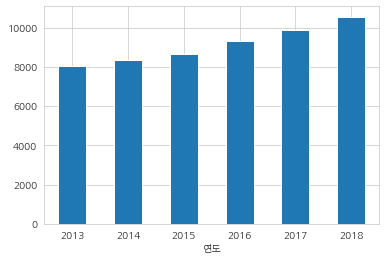

In [118]:
df_year_mean.plot.bar(rot=0)

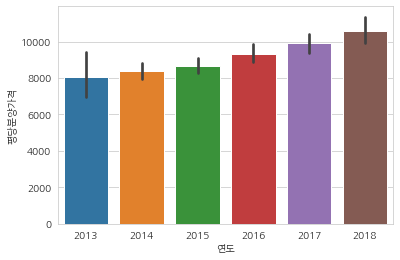

In [119]:
sns.barplot(data=df_2013_2018, x='연도', y='평당분양가격')

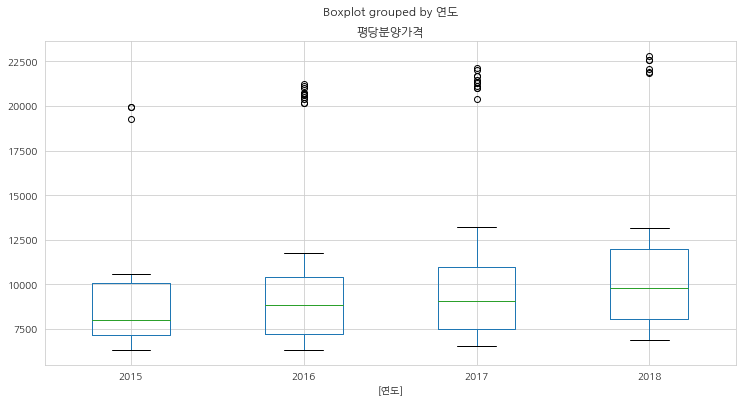

In [120]:
df_2015_2018_prepare[['연도', '지역명', '평당분양가격']].boxplot(by=['연도'], figsize=(12, 6))

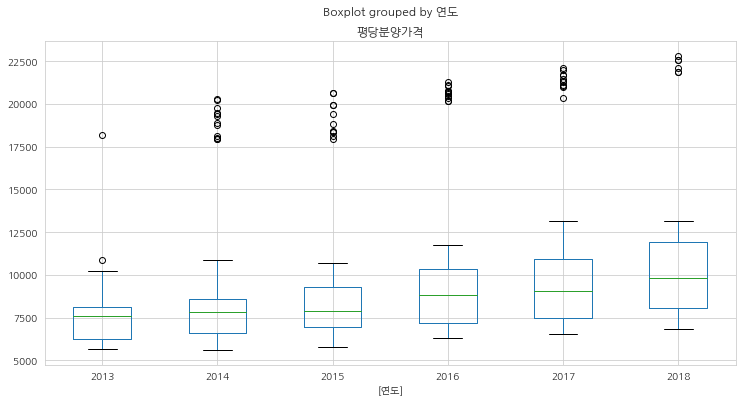

In [121]:
df_2013_2018[['연도', '지역명', '평당분양가격']].boxplot(by=['연도'], figsize=(12, 6))

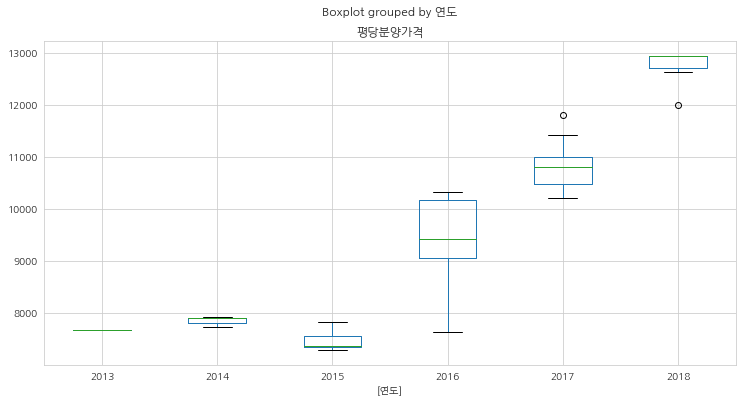

In [122]:
df_2013_2018_jeju = df_2013_2018.loc[df_2013_2018['지역명'] == '제주']
df_2013_2018_jeju[['연도', '지역명', '평당분양가격']].boxplot(by=['연도'], figsize=(12, 6))

In [123]:
df_2013_2018_jeju["연도"].value_counts()

2014    12
2017    12
2015    12
2016    10
2018     6
2013     1
Name: 연도, dtype: int64